### imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns

### read csv files


In [2]:
users = pd.read_csv('../../data/processed/cleaned_users.csv')
distribution_centers = pd.read_csv('../../data/processed/cleaned_distribution_centers.csv')
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
inventory_items = pd.read_csv('../../data/processed/cleaned_inventory_items.csv')
events = pd.read_csv('../../data/processed/cleaned_events.csv')
orders = pd.read_csv('../../data/processed/cleaned_orders.csv')
products = pd.read_csv('../../data/processed/cleaned_products.csv')

### 1. Geospatial Analysis (Distribution Centers and Users)


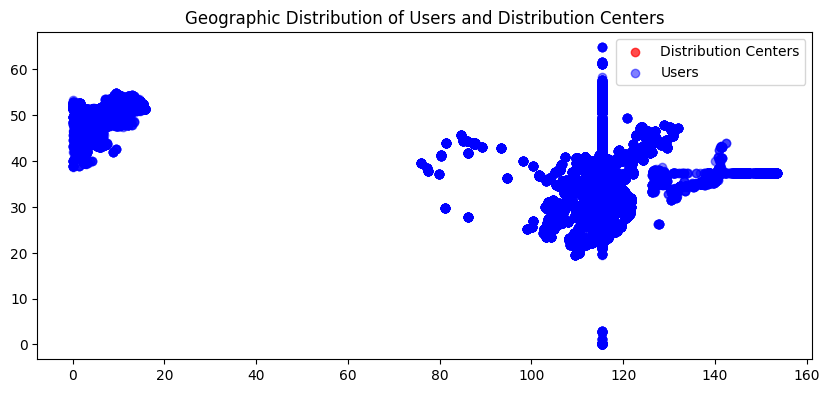

In [3]:

users_gdf = gpd.GeoDataFrame(users, geometry=gpd.GeoSeries.from_xy(users.longitude, users.latitude))
dc_gdf = gpd.GeoDataFrame(distribution_centers, geometry=gpd.GeoSeries.from_xy(distribution_centers.longitude, distribution_centers.latitude))

fig, ax = plt.subplots(figsize=(10, 10))
dc_gdf.plot(ax=ax, color='red', label='Distribution Centers', alpha=0.7)
users_gdf.plot(ax=ax, color='blue', label='Users', alpha=0.5)
plt.title("Geographic Distribution of Users and Distribution Centers")
plt.legend()
plt.show()


### 2. User Behavior Analysis


- Session Patterns: Plot the number of events by session ID or by user to understand session activity.


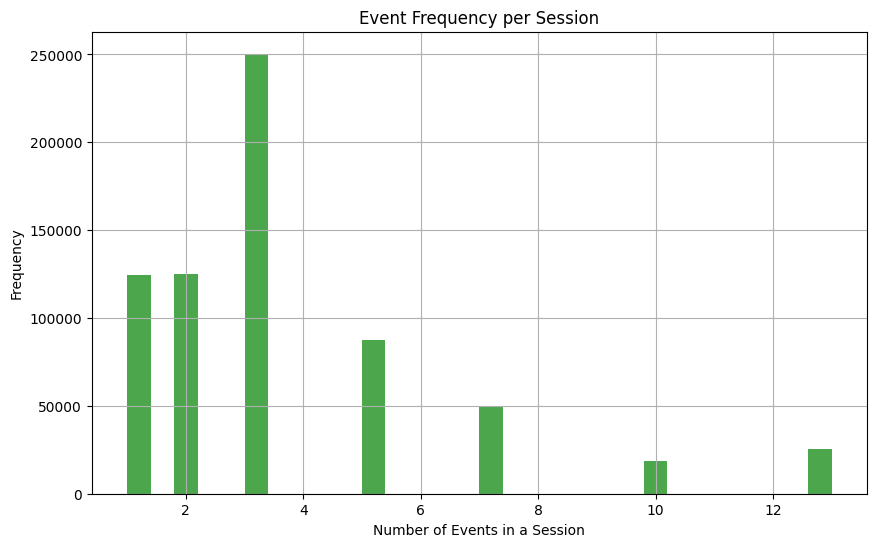

In [4]:

session_counts = events.groupby('session_id').size()

plt.figure(figsize=(10, 6))
session_counts.hist(bins=30, color='green', alpha=0.7)
plt.title("Event Frequency per Session")
plt.xlabel("Number of Events in a Session")
plt.ylabel("Frequency")
plt.show()


- Traffic Sources: Visualize the distribution of different traffic sources.


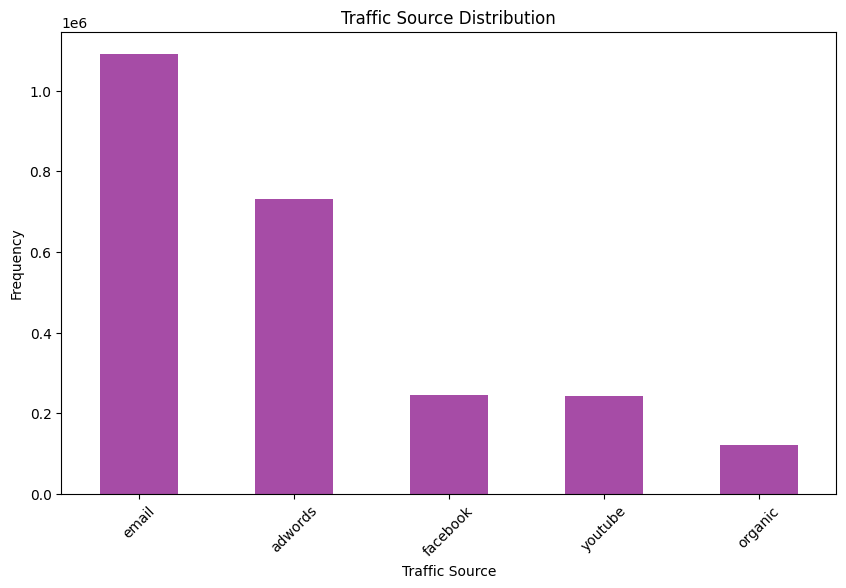

In [5]:
traffic_source_counts = events['traffic_source'].value_counts()

plt.figure(figsize=(10, 6))
traffic_source_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Traffic Source Distribution")
plt.xlabel("Traffic Source")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### 3. Sales and Revenue Analysis


In [6]:
display(order_items.columns)
display(inventory_items.columns)

Index(['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id',
       'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price'],
      dtype='object')

Index(['id', 'product_id', 'created_at', 'sold_at', 'cost', 'product_category',
       'product_name', 'product_brand', 'product_retail_price',
       'product_department', 'product_sku', 'product_distribution_center_id'],
      dtype='object')

In [7]:
sales_data = pd.merge(order_items, inventory_items, left_on='inventory_item_id', right_on='id')
sales_data.columns

Index(['id_x', 'order_id', 'user_id', 'product_id_x', 'inventory_item_id',
       'status', 'created_at_x', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price', 'id_y', 'product_id_y', 'created_at_y', 'sold_at', 'cost',
       'product_category', 'product_name', 'product_brand',
       'product_retail_price', 'product_department', 'product_sku',
       'product_distribution_center_id'],
      dtype='object')

In [8]:
sales_data['product_id'] = sales_data['product_id_y']
sales_data.drop(columns=['product_id_x', 'product_id_y', 'id_y'], inplace=True)

sales_data['quantity_sold'] = sales_data.groupby('inventory_item_id')['order_id'].transform('count')

sales_data['total_sales'] = sales_data['quantity_sold'] * sales_data['cost']

product_sales = sales_data.groupby('product_id')['total_sales'].sum().sort_values(ascending=False)

print(product_sales.head())

product_id
24428    6298.425023
8721     5353.529986
17094    4721.787002
23803    4537.920015
24899    4457.208017
Name: total_sales, dtype: float64


-  Top 10 Products by Total Sales (Bar Plot)

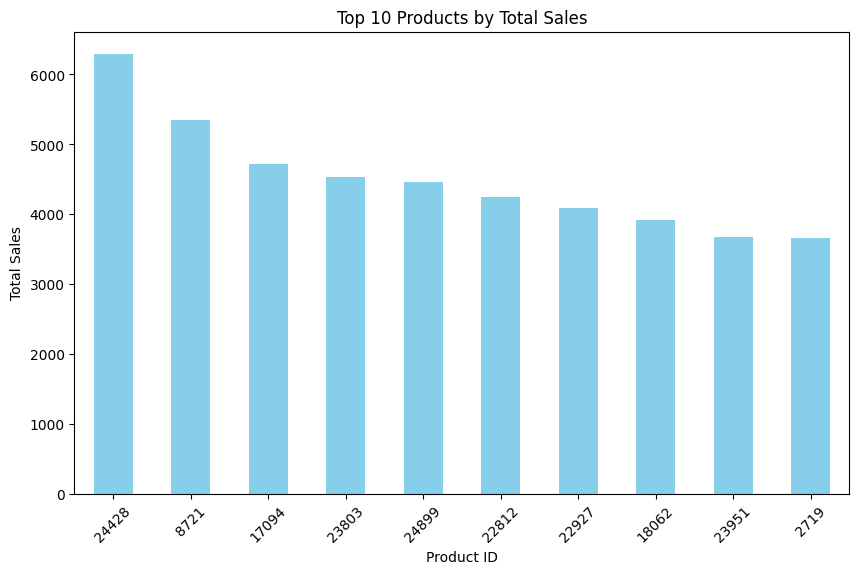

In [9]:

top_10_products = product_sales.head(10)

plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### 4. User Demographics Analysis


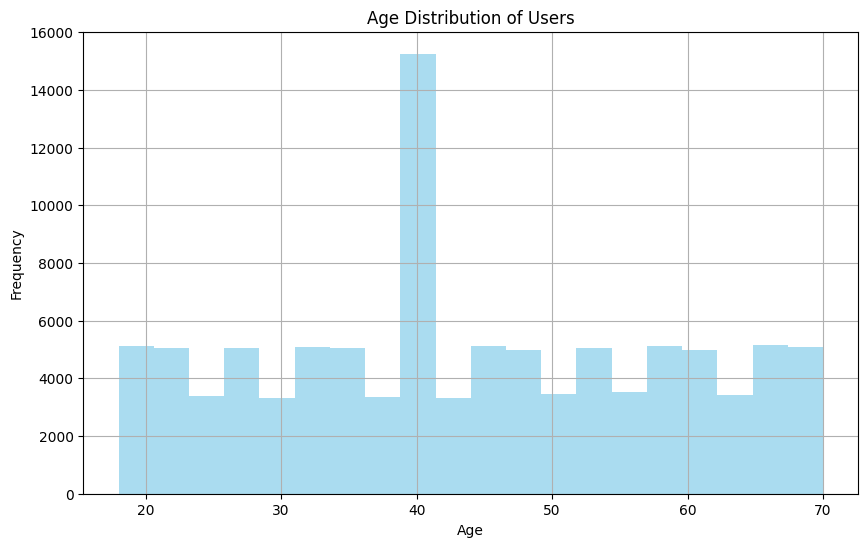

In [10]:

plt.figure(figsize=(10, 6))
users['age'].hist(bins=20, color='skyblue', alpha=0.7)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


- Gender Distribution of Users: Visualize the gender distribution of users.


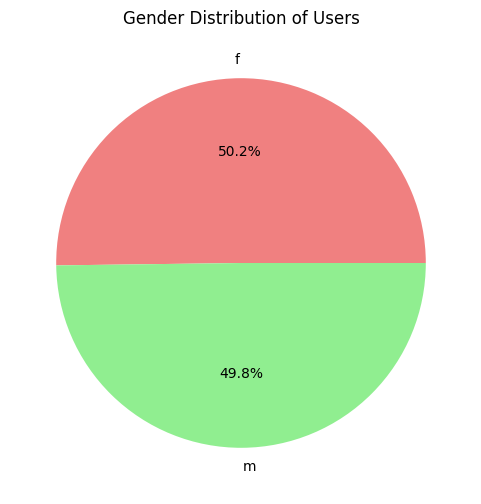

In [11]:
gender_counts = users['gender'].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title("Gender Distribution of Users")
plt.ylabel("")
plt.show()


### 5. Order Fulfillment Analysis


- Order Fulfillment Time: Visualize the time it takes for orders to be fulfilled (from creation to shipping or delivery).

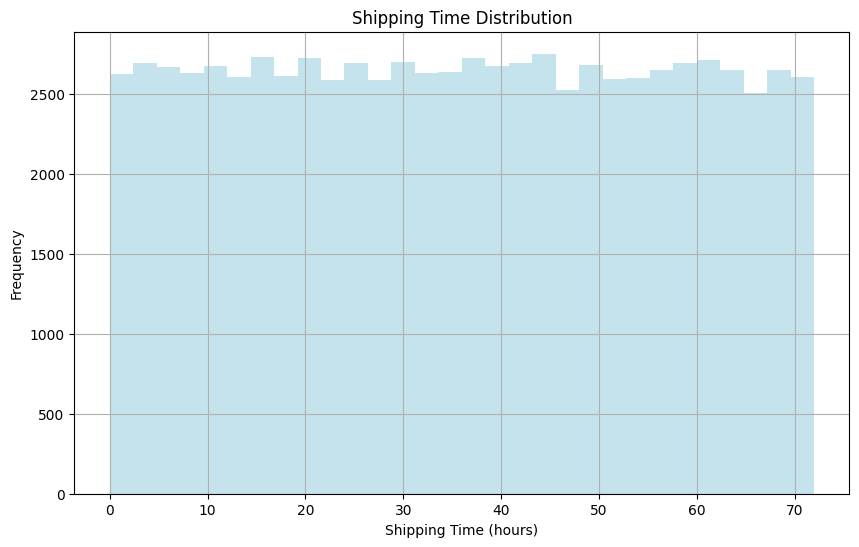

In [12]:

orders['created_at'] = pd.to_datetime(orders['created_at'])
orders['shipped_at'] = pd.to_datetime(orders['shipped_at'])
orders['delivered_at'] = pd.to_datetime(orders['delivered_at'])

orders['shipping_time'] = (orders['shipped_at'] - orders['created_at']).dt.total_seconds() / 3600  # In hours
orders['delivery_time'] = (orders['delivered_at'] - orders['created_at']).dt.total_seconds() / 3600  # In hours

plt.figure(figsize=(10, 6))
orders['shipping_time'].hist(bins=30, color='lightblue', alpha=0.7)
plt.title("Shipping Time Distribution")
plt.xlabel("Shipping Time (hours)")
plt.ylabel("Frequency")
plt.show()


### 6. Product Performance Analysis


- Cost vs. Retail Price: Visualize the relationship between product cost and retail price.

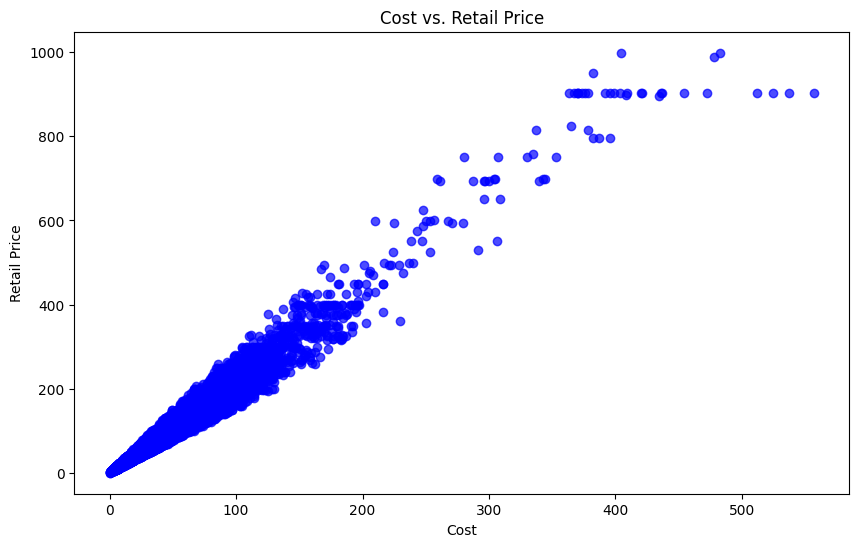

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(products['cost'], products['retail_price'], alpha=0.7, color='blue')
plt.title("Cost vs. Retail Price")
plt.xlabel("Cost")
plt.ylabel("Retail Price")
plt.show()


In [15]:
users = pd.read_csv('../../data/processed/cleaned_users.csv')
distribution_centers = pd.read_csv('../../data/processed/cleaned_distribution_centers.csv')
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
inventory_items = pd.read_csv('../../data/processed/cleaned_inventory_items.csv')
events = pd.read_csv('../../data/processed/cleaned_events.csv')
orders = pd.read_csv('../../data/processed/cleaned_orders.csv')
products = pd.read_csv('../../data/processed/cleaned_products.csv')

# Merge data
merged_data = pd.merge(order_items, orders, left_on='id', right_on='order_id', how='inner') 
merged_data = pd.merge(merged_data, users, left_on='id', right_on='id', suffixes=('_order', '_user'))
print(len(merged_data.dtypes))
merged_data = pd.merge(merged_data, products, left_on='product_id', right_on='id', suffixes=('', '_product'))
print(len(merged_data.dtypes))
print(merged_data.dtypes)


order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')

# Step 1: Prepare data as a list of transactions
# Each transaction contains a list of product IDs for that order
transactions = order_items.groupby('order_id')['product_id'].apply(list)
print(transactions)
print(len(order_items))


34
43
id                          int64
order_id_x                  int64
user_id_x                   int64
product_id                  int64
inventory_item_id           int64
status_x                   object
created_at_x               object
shipped_at_x               object
delivered_at_x             object
returned_at_x              object
sale_price                float64
order_id_y                  int64
user_id_y                   int64
status_y                   object
gender_order               object
created_at_y               object
returned_at_y              object
shipped_at_y               object
delivered_at_y             object
num_of_item               float64
first_name                 object
last_name                  object
email                      object
age                       float64
gender_user                object
state                      object
street_address             object
postal_code                object
city                       object
country 


Purchases by Location:
state
acre                    44
aichi                   66
akita                    3
alabama                170
alagoas                191
                      ... 
yamaguchi               12
yunnan                 434
zachodniopomorskie      27
zhejiang              2125
île-de-france         1221
Name: order_id, Length: 229, dtype: int64


C:\Users\click\AppData\Local\Temp\ipykernel_11360\3589578172.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_purchase.index, y=location_purchase.values, palette="coolwarm")


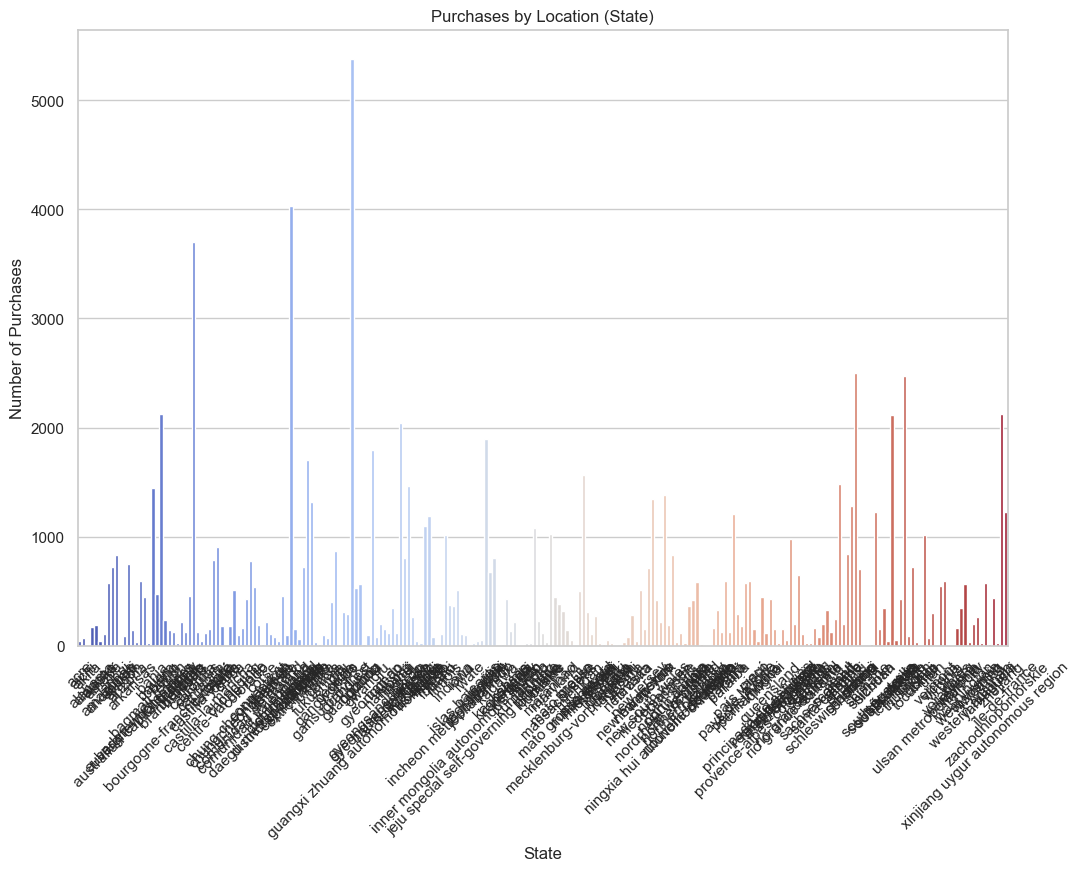

In [16]:
# Rename 'order_id_x' to 'order_id' for clarity
merged_data.rename(columns={'order_id_x': 'order_id'}, inplace=True)

location_purchase = merged_data.groupby('state')['order_id'].count()
print("\nPurchases by Location:")
print(location_purchase)

# Plot settings
sns.set(style="whitegrid")

# Purchases by Location
plt.figure(figsize=(12, 8))
sns.barplot(x=location_purchase.index, y=location_purchase.values, palette="coolwarm")
plt.title('Purchases by Location (State)')
plt.xlabel('State')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

In [17]:
import pandas as pd
from apyori import apriori

# Load data
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
print(len(order_items))
# Step 1: Sample a portion of the data (e.g., 10% of the dataset)
sampled_order_items = order_items.sample(frac=0.1, random_state=42)  # Adjust the frac value as needed
print(len(sampled_order_items))
# Step 2: Prepare data as a list of transactions
# Each transaction contains a list of product IDs for that order
transactions = sampled_order_items.groupby('order_id')['product_id'].apply(list)
print('transactions')
print(transactions)
# Step 3: Apply Apriori Algorithm
# Prepare transactions for apyori
transactions_list = transactions.tolist()
print('transactionlist')
print(transactions_list)

# Apply apriori with minimum support (e.g., 0.01 for 1%)
min_support = 0.01
results = list(apriori(transactions_list, min_support=min_support, min_lift=1.0))

print('results')
print(results)
# Step 4: Generate Association Rules and Output Results
# Convert results to a DataFrame for easier inspection
rules = []
for result in results:
    for item in result.ordered_statistics:
        rule = {
            'antecedents': tuple(item.items_base),
            'consequents': tuple(item.items_add),
            'support': result.support,
            'lift': item.lift,
            'confidence': item.confidence
        }
        rules.append(rule)

rules_df = pd.DataFrame(rules)

# Output results
print(f"Frequent Itemsets:\n{results}")
print(f"Association Rules:\n{rules_df}")



181759
18176
transactions
order_id
5                [18177]
11        [16199, 18243]
12               [17577]
22               [19737]
38               [26462]
               ...      
125199           [27749]
125215           [15531]
125217           [11362]
125224           [20828]
125226           [10017]
Name: product_id, Length: 17395, dtype: object
transactionlist
[[18177], [16199, 18243], [17577], [19737], [26462], [9336], [26390], [11205], [12957], [28694], [5809], [12528], [8865], [25647], [20421], [15312], [15365], [10792], [3202], [26703], [14158], [26516], [11707], [5323, 13264], [14495], [10451], [6131], [19766], [11306], [8275], [9526], [13331], [2777], [14859], [23794], [11715], [27619], [17402], [23615], [17192], [26591], [11772], [23443], [11569], [11089], [22089], [20798], [20624], [7557], [28692], [17834], [27808], [19612], [19746], [26129], [78], [9308], [1264], [139], [26379], [2957], [2112], [7162], [7252], [11737], [19253], [14879], [3867], [553], [15575], [8415]

In [ ]:

# useless for now 
import pandas as pd
from apyori import apriori

# Load data
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
print(f"Original dataset length: {len(order_items)}")

# Step 1: Sample a portion of the data (e.g., 10% of the dataset)
sampled_order_items = order_items.sample(frac=0.1, random_state=42)  # Adjust the frac value as needed
print(f"Sampled dataset length: {len(sampled_order_items)}")

# Step 2: Prepare data as a list of transactions
# Each transaction contains a list of product IDs for that order
transactions = sampled_order_items.groupby('order_id')['product_id'].apply(list)
print(f"Transactions sample:\n{transactions.head()}")

# Step 3: Apply Apriori Algorithm
# Prepare transactions for apyori
transactions_list = transactions.tolist()
print(f"First 5 transactions:\n{transactions_list[:5]}")

# Apply apriori with a lower minimum support threshold
min_support = 0.0001  # Lower support threshold (0.1%)
results = list(apriori(transactions_list, min_support=min_support, min_lift=1.0))

print(f"Results: {results}")

# Step 4: Generate Association Rules and Output Results
# Convert results to a DataFrame for easier inspection
rules = []
for result in results:
    for item in result.ordered_statistics:
        rule = {
            'antecedents': tuple(item.items_base),
            'consequents': tuple(item.items_add),
            'support': result.support,
            'lift': item.lift,
            'confidence': item.confidence
        }
        rules.append(rule)

rules_df = pd.DataFrame(rules)

# Output results
print(f"Frequent Itemsets:\n{results}")
print(f"Association Rules:\n{rules_df}")


Original dataset length: 181759
Sampled dataset length: 18176
Transactions sample:
order_id
5            [18177]
11    [16199, 18243]
12           [17577]
22           [19737]
38           [26462]
Name: product_id, dtype: object
First 5 transactions:
[[18177], [16199, 18243], [17577], [19737], [26462]]
Results: [RelationRecord(items=frozenset({17}), support=0.00011497556769186548, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({17}), confidence=0.00011497556769186548, lift=1.0)]), RelationRecord(items=frozenset({30}), support=0.00011497556769186548, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({30}), confidence=0.00011497556769186548, lift=1.0)]), RelationRecord(items=frozenset({43}), support=0.00011497556769186548, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({43}), confidence=0.00011497556769186548, lift=1.0)]), RelationRecord(items=frozenset({44}), support=0.00011497556769186548

Top 10 Frequent Itemsets with Product Names:
                                              itemsets   support
165  life is good men's king of the grill short sle...  0.000168
120  bayside apparel adult usa-made long-sleeve poc...  0.000152
259  haggar men's tonal stria pleat front cuff dres...  0.000152
340             thorlo men's lt walking mini crew sock  0.000144
198    elegant men's two button three piece strip suit  0.000144
391  mens print hot body boxer swimsuit gary majdel...  0.000144
381          knothe - mens waffle weave robe tan 29649  0.000144
347                    michael kors men's 3 pack brief  0.000144
303  wrangler rugged wear men's unlined denim jacke...  0.000136
192             nautica men's striped crewneck sweater  0.000136


C:\Users\click\AppData\Local\Temp\ipykernel_18760\745568558.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets', data=itemsets_df, palette='viridis')


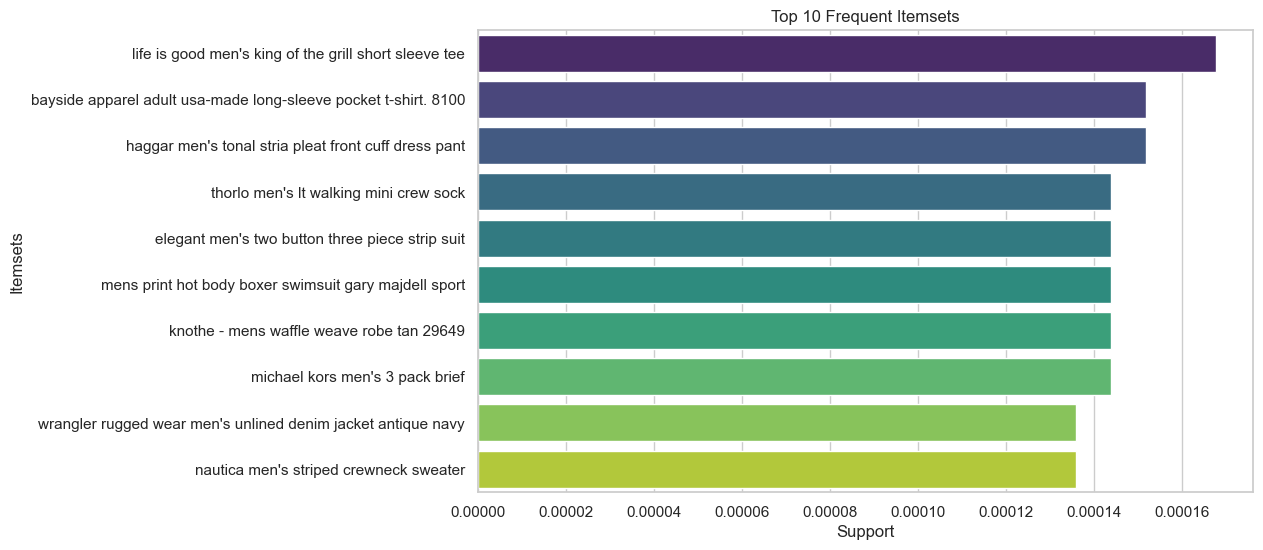

In [84]:
# Load the cleaned product data to map product_id to name
products = pd.read_csv('../../data/processed/cleaned_products.csv')
product_mapping = dict(zip(products['id'], products['name']))  # Create a dictionary for product_id to name

# Visualization 1: Top 10 Frequent Itemsets with Product Names
# Extract the itemsets and their support values, and map product IDs to names
itemsets = []
support = []
for result in results:
    # Map the product IDs in the itemset to product names
    itemset_names = ', '.join([product_mapping.get(int(pid), f"Unknown({pid})") for pid in result.items])
    itemsets.append(itemset_names)
    support.append(result.support)

# Create a DataFrame for better visualization
itemsets_df = pd.DataFrame({'itemsets': itemsets, 'support': support})

# Sort by support and plot the top itemsets
itemsets_df = itemsets_df.sort_values(by='support', ascending=False).head(10)

# Display the top 10 frequent itemsets with their names
print("Top 10 Frequent Itemsets with Product Names:")
print(itemsets_df)

# Plot top itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=itemsets_df, palette='viridis')
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


In [82]:
# Load the cleaned product data to map product_id to name
products = pd.read_csv('../../data/processed/cleaned_products.csv')
product_mapping = dict(zip(products['id'], products['name']))  # Create a dictionary for product_id to name

# Extract the itemsets and their support values, and map product IDs to names
product_names = []
support = []
for result in results:
    # Map the product IDs in the itemset to product names
    itemset_names = [product_mapping.get(int(pid), f"Unknown({pid})") for pid in result.items]
    product_names.append(itemset_names)
    support.append(result.support)

# Create a DataFrame for better visualization
product_names_df = pd.DataFrame({'itemsets': product_names, 'support': support})

# Sort by support and get the top 10
product_names_df = product_names_df.sort_values(by='support', ascending=False).head(10)

# Display the individual products from the top 10 frequent itemsets
print("Top 10 Frequent Itemsets with Individual Product Names:")
for index, row in product_names_df.iterrows():
    print(f"Itemset: {', '.join(row['itemsets'])} - Support: {row['support']}")


Top 10 Frequent Itemsets with Individual Product Names:
Itemset: life is good men's king of the grill short sleeve tee - Support: 0.0001676968041780461
Itemset: bayside apparel adult usa-made long-sleeve pocket t-shirt. 8100 - Support: 0.00015172567997061314
Itemset: haggar men's tonal stria pleat front cuff dress pant - Support: 0.00015172567997061314
Itemset: thorlo men's lt walking mini crew sock - Support: 0.00014374011786689664
Itemset: elegant men's two button three piece strip suit - Support: 0.00014374011786689664
Itemset: mens print hot body boxer swimsuit gary majdell sport - Support: 0.00014374011786689664
Itemset: knothe - mens waffle weave robe tan 29649 - Support: 0.00014374011786689664
Itemset: michael kors men's 3 pack brief - Support: 0.00014374011786689664
Itemset: wrangler rugged wear men's unlined denim jacket antique navy - Support: 0.00013575455576318016
Itemset: nautica men's striped crewneck sweater - Support: 0.00013575455576318016


In [74]:
# Extract individual products from top itemsets
top_10_itemsets = itemsets_df.head(10)  # Assuming itemsets_df is already sorted by support
# Loop through the itemsets and print individual product names
for idx, row in top_10_itemsets.iterrows():
    # Split the itemset into individual products (assuming products are separated by a comma)
    products = row['itemsets'].split(' , ')  # Adjust this delimiter if needed
    product_list = ', '.join(products)  # Join products with a comma
    
    # Print the itemset and its support with comma-separated products
    print(f"Itemset: {product_list} - Support: {row['support']}")


Itemset: life is good men's king of the grill short sleeve tee - Support: 0.0001676968041780461
Itemset: bayside apparel adult usa-made long-sleeve pocket t-shirt. 8100 - Support: 0.00015172567997061314
Itemset: haggar men's tonal stria pleat front cuff dress pant - Support: 0.00015172567997061314
Itemset: thorlo men's lt walking mini crew sock - Support: 0.00014374011786689664
Itemset: elegant men's two button three piece strip suit - Support: 0.00014374011786689664
Itemset: mens print hot body boxer swimsuit gary majdell sport - Support: 0.00014374011786689664
Itemset: knothe - mens waffle weave robe tan 29649 - Support: 0.00014374011786689664
Itemset: michael kors men's 3 pack brief - Support: 0.00014374011786689664
Itemset: wrangler rugged wear men's unlined denim jacket antique navy - Support: 0.00013575455576318016
Itemset: nautica men's striped crewneck sweater - Support: 0.00013575455576318016


In [76]:
# Filter out single-product itemsets
filtered_itemsets = itemsets_df[itemsets_df['itemsets'].apply(lambda x: len(x.split(' , ')) > 1)]

# Print top itemsets with multiple products
for idx, row in filtered_itemsets.head(10).iterrows():
    # Split the itemset into individual products (assuming products are separated by a comma)
    products = row['itemsets'].split(' , ')  # Adjust this delimiter if needed
    product_list = ', '.join(products)  # Join products with a comma
    
    # Print the itemset and its support with comma-separated products
    print(f"Itemset: {product_list} - Support: {row['support']}")


In [ ]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
# most likely the working code
# Load data
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
print(f"Original dataset length: {len(order_items)}")

sampled_order_items = order_items.sample(frac=0.1, random_state=42)  # 10% of the data
# Sample a portion of the data (you can adjust the fraction)
#sampled_order_items = order_items  # Use the full dataset

# Prepare data as a list of transactions
transactions = sampled_order_items.groupby('order_id')['product_id'].apply(list)
print(f"Transactions sample:\n{transactions.head()}")

# Prepare transactions for apriori
transactions_list = transactions.tolist()
print(f"First 5 transactions:\n{transactions_list[:5]}")

# Apply apriori with lower minimum support threshold
min_support = 0.00001
min_lift = 1.0

results = list(apriori(transactions_list, min_support=min_support, min_lift=min_lift, min_len=2))

filtered_results = [result for result in results if len(result.items) > 1]
results = filtered_results
# Results: Frequent itemsets and association rules
print(f"Results: {results}")

# Generate Association Rules and Output Results
rules = []
for result in results:
    for item in result.ordered_statistics:
        rule = {
            'antecedents': tuple(item.items_base),
            'consequents': tuple(item.items_add),
            'support': result.support,
            'lift': item.lift,
            'confidence': item.confidence
        }
        rules.append(rule)

rules_df = pd.DataFrame(rules)

# Output results
print(f"Frequent Itemsets:\n{results}")
print(f"Association Rules:\n{rules_df}")


Original dataset length: 181759
Transactions sample:
order_id
5            [18177]
11    [16199, 18243]
12           [17577]
22           [19737]
38           [26462]
Name: product_id, dtype: object
First 5 transactions:
[[18177], [16199, 18243], [17577], [19737], [26462]]
Results: [RelationRecord(items=frozenset({43, 5011}), support=5.748778384593274e-05, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({43, 5011}), confidence=5.748778384593274e-05, lift=1.0), OrderedStatistic(items_base=frozenset({43}), items_add=frozenset({5011}), confidence=0.5, lift=8697.5), OrderedStatistic(items_base=frozenset({5011}), items_add=frozenset({43}), confidence=1.0, lift=8697.5)]), RelationRecord(items=frozenset({10097, 76}), support=5.748778384593274e-05, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({10097, 76}), confidence=5.748778384593274e-05, lift=1.0), OrderedStatistic(items_base=frozenset({76}), items_add=frozenset({10097}), c

In [ ]:
# Plot 1: Top 10 Filtered Frequent Itemsets by Support
plt.figure(figsize=(10, 6))
top_filtered_itemsets = filtered_itemsets.nlargest(10, 'support')
sns.barplot(data=top_filtered_itemsets, x='support', y=top_filtered_itemsets['itemsets'].astype(str))
plt.title('Top 10 Frequent Itemsets with More Than One Product (by Support)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Plot 2: Association Rules - Lift vs Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', size='support', hue='antecedents', legend=False, sizes=(20, 200))
plt.title('Lift vs Confidence of Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()

# Plot 3: Heatmap of Antecedent-Consequent Lift
# Pivot table for lift
pivot = rules.pivot_table(index='antecedents', columns='consequents', values='lift', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Lift Heatmap (Filtered Antecedents vs Consequents)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

In [17]:
users = pd.read_csv('../../data/processed/cleaned_users.csv')
print(len(users))

100000


In [14]:
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')

print(order_items[:3])
duplicates = order_items.groupby(['user_id', 'product_id']).size().reset_index(name='purchase_count')
duplicates = duplicates[duplicates['purchase_count'] > 1]
print("len duplicates")
print(duplicates)

       id  order_id  user_id  product_id  inventory_item_id     status  \
0  152013    104663    83582       14235             410368  cancelled   
1   40993     28204    22551       14235             110590   complete   
2   51224     35223    28215       14235             138236   complete   

                  created_at                 shipped_at  \
0  2023-05-07 06:08:40+00:00                        NaN   
1  2023-03-14 03:47:21+00:00  2023-03-15 22:57:00+00:00   
2  2023-12-05 13:25:30+00:00  2023-12-06 01:20:00+00:00   

                delivered_at returned_at  sale_price  
0                        NaN         NaN        0.02  
1  2023-03-18 01:08:00+00:00         NaN        0.02  
2  2023-12-10 10:04:00+00:00         NaN        0.02  
len duplicates
        user_id  product_id  purchase_count
17080      9476       21845               2
38753     21319        4310               2
64593     35593        6387               2
80995     44636       26820               2
86176     4

In [29]:
# most purchased itemsets by category

import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Load the data
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
products = pd.read_csv('../../data/processed/cleaned_products.csv')


# Merge to include category information
merged = pd.merge(order_items, products[['id', 'category']], left_on='product_id', right_on='id')

# Group by user_id to create transaction lists by category
transactions_by_user = merged.groupby('user_id')['category'].apply(set).reset_index()
transactions_by_user['category'] = transactions_by_user['category'].apply(list)

# Convert to one-hot encoded sparse matrix
categories = sorted(set(merged['category']))
ohe_data = pd.DataFrame(0, index=transactions_by_user['user_id'], columns=categories)

for idx, row in transactions_by_user.iterrows():
    ohe_data.loc[row['user_id'], row['category']] = 1

# Run FP-Growth
min_support = 0.01  # Adjust as needed
frequent_itemsets = fpgrowth(ohe_data, min_support=min_support, use_colnames=True)

num_itemsets = 10
#print("current num itemsets ")
#print(num_itemsets)
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0,num_itemsets=num_itemsets)

# Output results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


C:\Users\click\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                      itemsets
0    0.145782                       (jeans)
1    0.107216                      (active)
2    0.038229           (blazers & jackets)
3    0.085041                   (underwear)
4    0.132315                        (swim)
..        ...                           ...
116  0.016603        (intimates, maternity)
117  0.011094   (pants & capris, intimates)
118  0.010632         (intimates, leggings)
119  0.014280             (intimates, plus)
120  0.013043  (socks & hosiery, intimates)

[121 rows x 2 columns]

Association Rules:
           antecedents        consequents  antecedent support  \
0              (jeans)           (active)            0.145782   
1             (active)            (jeans)            0.107216   
2               (swim)           (active)            0.132315   
3             (active)             (swim)            0.107216   
4     (sleep & lounge)           (active)            0.127655   
..                 

Average purchases per user: 1.2366015246724769


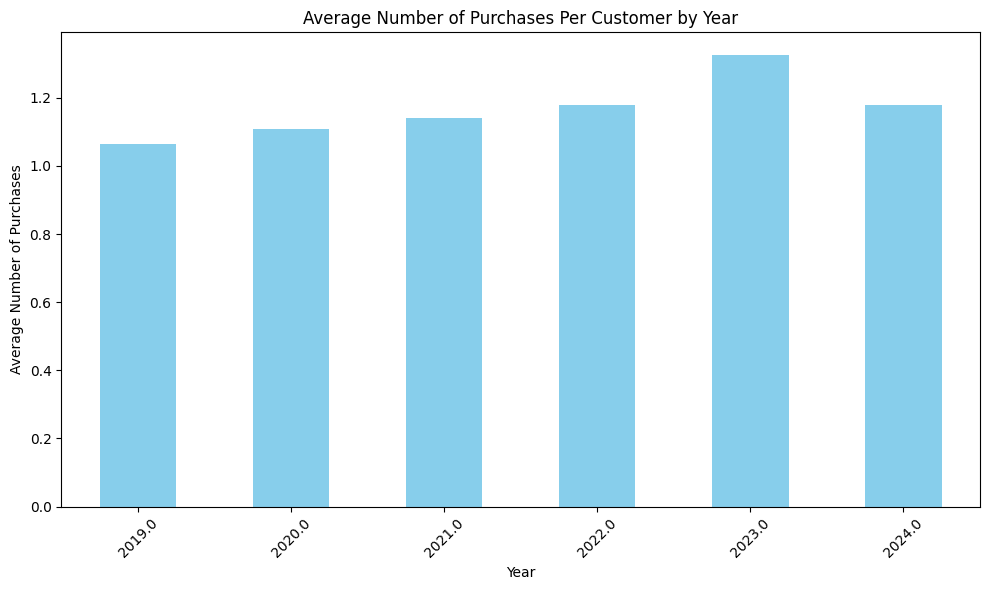

In [28]:
# edit it to remove sleeping accounts 

import matplotlib.pyplot as plt
# Load your orders data (assuming it has `user_id` and `order_date` columns)
order_items['created_at'] = pd.to_datetime(order_items['created_at'])  # Convert to datetime if it's not already

# Add a column for the year of purchase
order_items['year'] = order_items['created_at'].dt.year

# Group by `user_id` and `year` to count the number of orders each user made in each year
user_purchase_count = order_items.groupby(['user_id', 'year'])['order_id'].nunique().reset_index()

# Calculate the average number of purchases per user over the years
avg_purchases_per_user = user_purchase_count.groupby('user_id')['order_id'].mean()

# Print average purchases per user
print(f"Average purchases per user: {avg_purchases_per_user.mean()}")

# Group by 'year' and calculate the average purchases per user
avg_purchases_per_year = user_purchase_count.groupby('year')['order_id'].mean()

# Plot the average purchases per year
plt.figure(figsize=(10, 6))
avg_purchases_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Number of Purchases Per Customer by Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


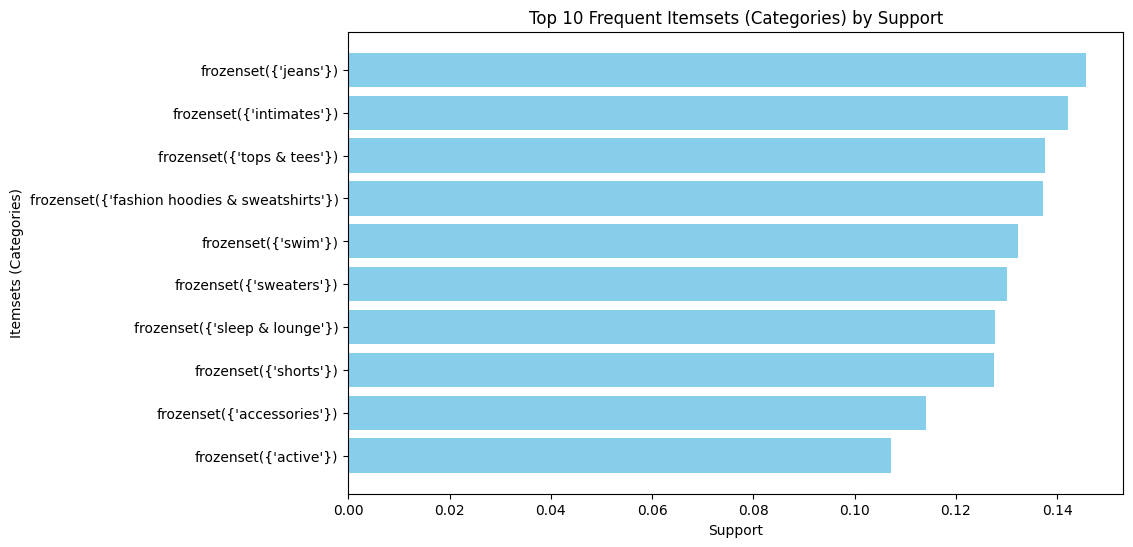

In [21]:
import matplotlib.pyplot as plt

# Top 10 frequent itemsets by support (adjust as needed)
top_itemsets = frequent_itemsets.nlargest(10, 'support')

# Plot the top itemsets
plt.figure(figsize=(10,6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets (Categories)')
plt.title('Top 10 Frequent Itemsets (Categories) by Support')
plt.gca().invert_yaxis()  # To display the highest support at the top
plt.show()


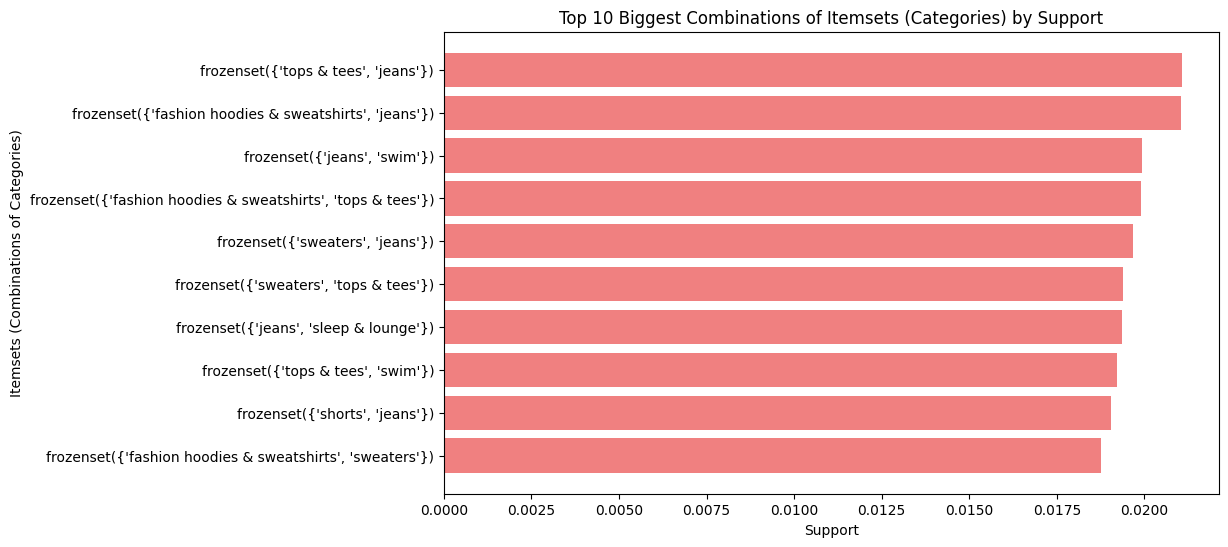

In [24]:
# itemsets with atleast 2 items 
import matplotlib.pyplot as plt

# Filter itemsets to keep only those with more than 1 item
filtered_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

# Sort by support in descending order to get the biggest combinations
top_combinations = filtered_itemsets.nlargest(10, 'support')

# Plot the biggest combinations of itemsets
plt.figure(figsize=(10,6))
plt.barh(top_combinations['itemsets'].astype(str), top_combinations['support'], color='lightcoral')
plt.xlabel('Support')
plt.ylabel('Itemsets (Combinations of Categories)')
plt.title('Top 10 Biggest Combinations of Itemsets (Categories) by Support')
plt.gca().invert_yaxis()  # To display the highest support at the top
plt.show()


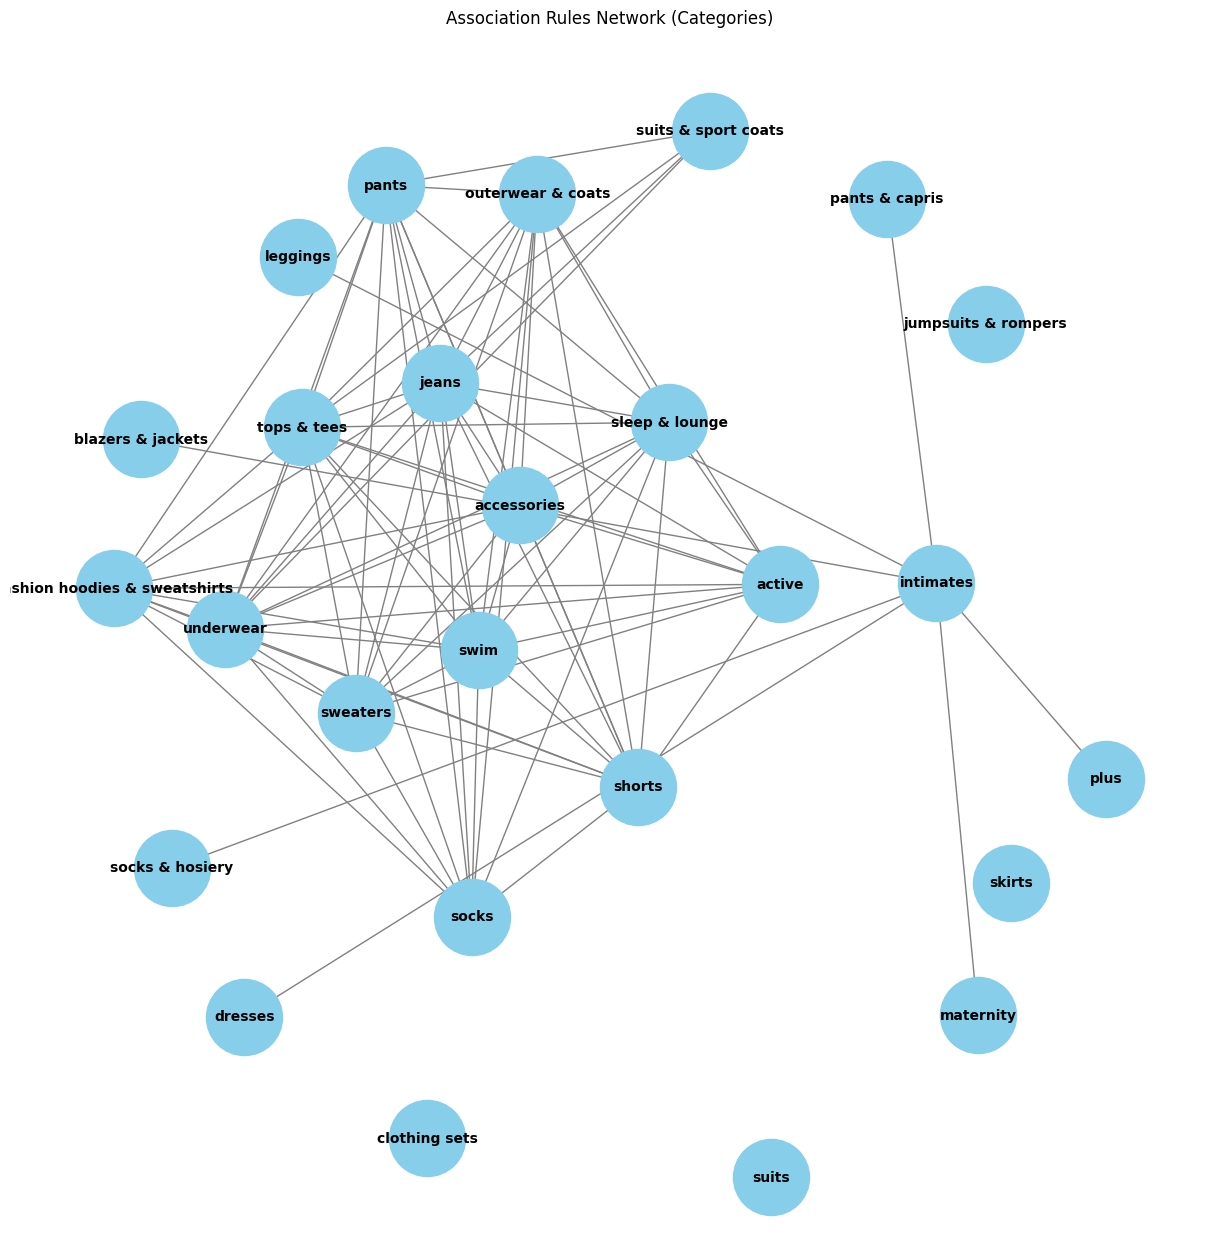

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (unique categories)
for category in transactions_by_user['category'].explode().unique():
    G.add_node(category)

# Add edges based on association rules
for _, row in rules.iterrows():
    from_category = ', '.join(row['antecedents'])  # Convert frozenset to string
    to_category = ', '.join(row['consequents'])    # Convert frozenset to string
    support = row['support']
    lift = row['lift']

    # Add an edge between the categories with support and lift as attributes
    G.add_edge(from_category, to_category, weight=support, lift=lift)

# Plot the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray')
plt.title('Association Rules Network (Categories)')
plt.show()



## Accounts with no purchases

Percentage of Sleeping Accounts: 19.956%


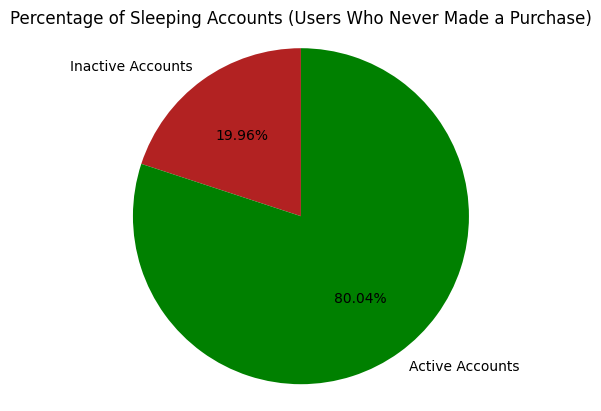

In [34]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
users = pd.read_csv('../../data/processed/cleaned_users.csv')  # Assuming you have a users file

# Get the list of users who made at least one purchase (based on order_items)
active_users = order_items['user_id'].unique()

# Get the list of all users
all_users = users['id'].unique()

# Find the sleeping users (those who never made a purchase)
sleeping_users = set(all_users) - set(active_users)

# Calculate the exact percentage of sleeping accounts
sleeping_percentage = len(sleeping_users) / len(all_users) * 100

# Print the exact percentage
print(f"Percentage of Sleeping Accounts: {sleeping_percentage}%")

# Plot the results
labels = ['Inactive Accounts', 'Active Accounts']
sizes = [sleeping_percentage, 100 - sleeping_percentage]

colors = ['#B22222','#008000']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Sleeping Accounts (Users Who Never Made a Purchase)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()



In [51]:
unique_brands = products['brand'].nunique()
unique_categories = products['category'].nunique()

print(f"Unique Brands: {unique_brands}")
print(f"Unique Categories: {unique_categories}")

# Check if categories are a subset of brands
# Create a mapping of categories to brands
category_to_brands = products.groupby('category')['brand'].unique()

# Check if every category has at least one brand (subset check)
subset_check = all(len(brands) > 0 for brands in category_to_brands)

print(f"Are categories a subset of brands? {'Yes' if subset_check else 'No'}")

# Also, you can check how many brands are mapped to each category
category_to_brands_counts = category_to_brands.apply(len)

# Print the categories and the count of brands in them
print("\nNumber of brands in each category:")
print(category_to_brands_counts)

Unique Brands: 2718
Unique Categories: 26
Are categories a subset of brands? Yes

Number of brands in each category:
category
accessories                      418
active                           270
blazers & jackets                143
clothing sets                     23
dresses                          180
fashion hoodies & sweatshirts    401
intimates                        354
jeans                            221
jumpsuits & rompers               56
leggings                         159
maternity                        157
outerwear & coats                285
pants                            199
pants & capris                   196
plus                             273
shorts                           389
skirts                           151
sleep & lounge                   279
socks                            189
socks & hosiery                  171
suits                             18
suits & sport coats              145
sweaters                         347
swim                   

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Load the data
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')
products = pd.read_csv('../../data/processed/cleaned_products.csv')

# Merge to include brand information
merged = pd.merge(order_items, products[['id', 'brand']], left_on='product_id', right_on='id')

# Group by user_id to create transaction lists by brand
transactions_by_user = merged.groupby('user_id')['brand'].apply(set).reset_index()
transactions_by_user['brand'] = transactions_by_user['brand'].apply(list)

# Convert to one-hot encoded sparse matrix
brands = sorted(set(merged['brand']))
ohe_data = pd.DataFrame(0, index=transactions_by_user['user_id'], columns=brands)

for idx, row in transactions_by_user.iterrows():
    ohe_data.loc[row['user_id'], row['brand']] = 1

# Run FP-Growth
min_support = 0.001  # Adjust as needed
frequent_itemsets = fpgrowth(ohe_data, min_support=min_support, use_colnames=True)

# Generate Association Rules
num_itemsets = 10  # Adjust based on how many itemsets you want
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Output results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


C:\Users\click\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                       itemsets
0    0.020526               (tommy hilfiger)
1    0.008046                  (joe's jeans)
2    0.005772              (evogues apparel)
3    0.006184                 (tommy bahama)
4    0.023112                       (volcom)
..        ...                            ...
470  0.001412             (hanes, allegra k)
471  0.001512     (allegra k, finebrandshop)
472  0.001237            (speedo, allegra k)
473  0.001224  (allegra k, american apparel)
474  0.001024       (lucky brand, allegra k)

[475 rows x 2 columns]

Association Rules:
               antecedents             consequents  antecedent support  \
0         (tommy hilfiger)          (calvin klein)            0.020526   
1           (calvin klein)        (tommy hilfiger)            0.039966   
2           (calvin klein)                (volcom)            0.039966   
3                 (volcom)          (calvin klein)            0.023112   
4               (carhartt) 

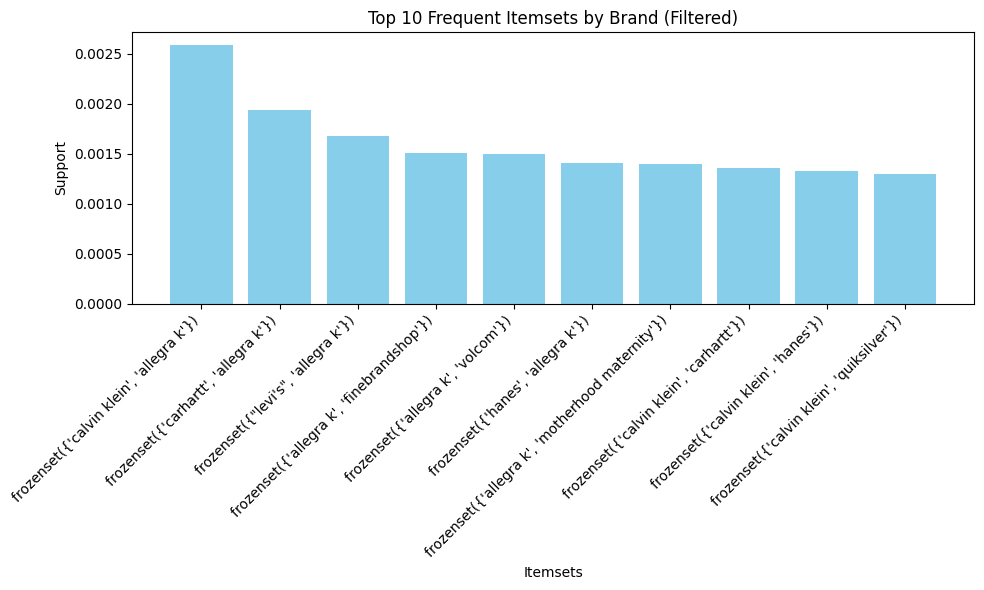

In [27]:
import matplotlib.pyplot as plt

# Filter out itemsets with only one item
frequent_itemsets_filtered = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

# Sort the filtered frequent itemsets by support value
frequent_itemsets_sorted = frequent_itemsets_filtered.sort_values(by='support', ascending=False)

# Select top 10 frequent itemsets
top_itemsets = frequent_itemsets_sorted.head(10)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_itemsets['itemsets'].astype(str), top_itemsets['support'], color='skyblue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 10 Frequent Itemsets by Brand (Filtered)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


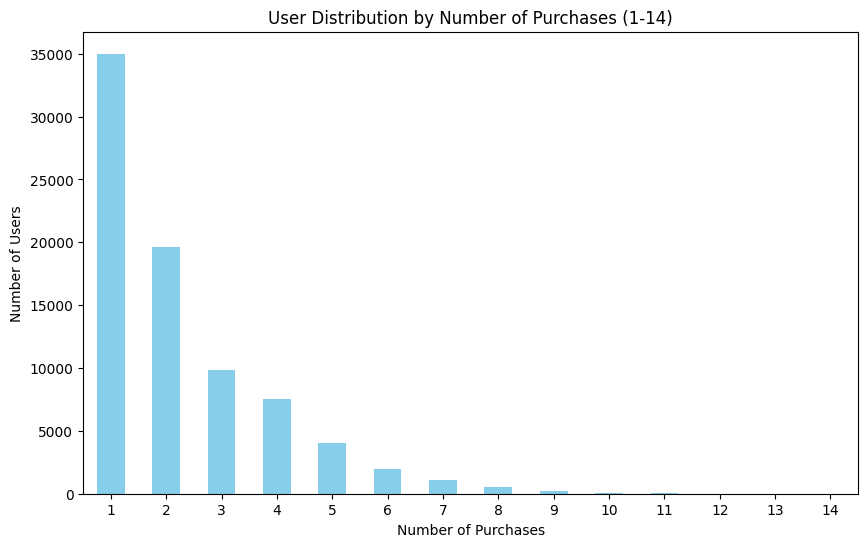

purchases
1     34996
2     19613
3      9851
4      7520
5      4025
6      1984
7      1131
8       561
9       227
10       88
11       33
12       12
13        2
14        1
Name: count, dtype: int64


In [24]:

# Group by user_id and count the number of purchases
user_purchases = order_items.groupby('user_id').size().reset_index(name='purchases')

# Filter users who made between 1 and 14 purchases
filtered_user_purchases = user_purchases[(user_purchases['purchases'] >= 1) & (user_purchases['purchases'] <= 14)]

# Count the number of users for each purchase count
purchase_counts = filtered_user_purchases['purchases'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.title('User Distribution by Number of Purchases (1-14)')
plt.xticks(rotation=0)
plt.show()

# Count the number of users for each purchase count
purchase_counts = user_purchases['purchases'].value_counts().sort_index()

print(purchase_counts)


In [23]:
# Output is in PowerBi

orders = pd.read_csv('../../data/processed/cleaned_orders.csv')
inventory_items = pd.read_csv('../../data/processed/cleaned_inventory_items.csv')
products = pd.read_csv('../../data/processed/cleaned_products.csv')

# Filter returned orders
returned_orders = orders[orders['returned_at'].notna()]

# Merge returned orders with order_items to get product-level return data
returned_items = pd.merge(returned_orders, order_items, on='order_id')

# Calculate total returns per product
returns_per_product = returned_items.groupby('product_id').size().reset_index(name='num_returns')

# Calculate total sales per product
sales_per_product = order_items.groupby('product_id').size().reset_index(name='num_sales')

# Merge returns and sales
product_stats = pd.merge(sales_per_product, returns_per_product, on='product_id', how='left')

# Fill NaN values in num_returns with 0 (products that were never returned)
product_stats['num_returns'] = product_stats['num_returns'].fillna(0)

# Calculate return rate
product_stats['return_rate'] = product_stats['num_returns'] / product_stats['num_sales']

# Merge with products to get product details
product_stats = pd.merge(product_stats, products[['id', 'name']], left_on='product_id', right_on='id')

# Sort by return rate and select top 10
top_returned_products = product_stats.sort_values(by='return_rate', ascending=False).head(100)
print(top_returned_products)




       product_id  num_sales  num_returns  return_rate     id  \
4053         4073          1          1.0     1.000000   4073   
15035       15095          1          1.0     1.000000  15095   
11632       11682          1          1.0     1.000000  11682   
6178         6208          3          3.0     1.000000   6208   
23134       23205          1          1.0     1.000000  23205   
...           ...        ...          ...          ...    ...   
6369         6399          3          2.0     0.666667   6399   
7342         7380          3          2.0     0.666667   7380   
8109         8148          3          2.0     0.666667   8148   
17060       17122          3          2.0     0.666667  17122   
29027       29102          3          2.0     0.666667  29102   

                                                    name  
4053   brave soul ladies/womens stripe pattern summer...  
15035  motherhood maternity: secret fit belly(r) midc...  
11632             jezebel women's animal a

In [22]:
# Filter for returned orders
returned_orders = order_items[order_items['status'] == 'returned']
print(returned_orders)

# Merge with products to get brand info
returned_orders_with_brands = pd.merge(
    returned_orders,
    products[['id', 'brand']],
    left_on='product_id',
    right_on='id',
    how='left'
)

# Calculate total returns per brand
returns_by_brand = returned_orders_with_brands.groupby('brand').size()

# Calculate total purchases per brand
purchases_by_brand = order_items.merge(
    products[['id', 'brand']],
    left_on='product_id',
    right_on='id',
    how='left'
).groupby('brand').size()

# Calculate return rate
return_rates = (returns_by_brand / purchases_by_brand).fillna(0) * 100

# Sort and get the top 100 brands
top_100_brands = return_rates.sort_values(ascending=False).head(100)

# Print the results
print("top 100 brands : ")
print(top_100_brands)


            id  order_id  user_id  product_id  inventory_item_id    status  \
18      142854     98355    78482       28700             385646  returned   
23       12417      8613     6882       13629              33494  returned   
28       49378     33965    27223       14298             133187  returned   
58       93025     64020    51156        3049             251111  returned   
59      140789     96914    77336        3049             380056  returned   
...        ...       ...      ...         ...                ...       ...   
181680  146817    101102    80694       24283             396362  returned   
181681  161815    111456    89025       10453             436843  returned   
181682  162279    111767    89268       22812             438066  returned   
181736   83492     57450    45985       24341             225307  returned   
181754    9674      6679     5325       24447              26095  returned   

                       created_at                 shipped_at  \

## Categories by season

C:\Users\click\AppData\Local\Temp\ipykernel_17096\2311968017.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(season_data['category'], rotation=30, ha='right', fontsize=10, wrap=True)
C:\Users\click\AppData\Local\Temp\ipykernel_17096\2311968017.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(season_data['category'], rotation=30, ha='right', fontsize=10, wrap=True)
C:\Users\click\AppData\Local\Temp\ipykernel_17096\2311968017.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(season_data['category'], rotation=30, ha='right', fontsize=10, wrap=True)
C:\Users\click\AppData\Local\Temp\ipykernel_17096\2311968017.py:49: UserWarning: set_ticklabels() should only be

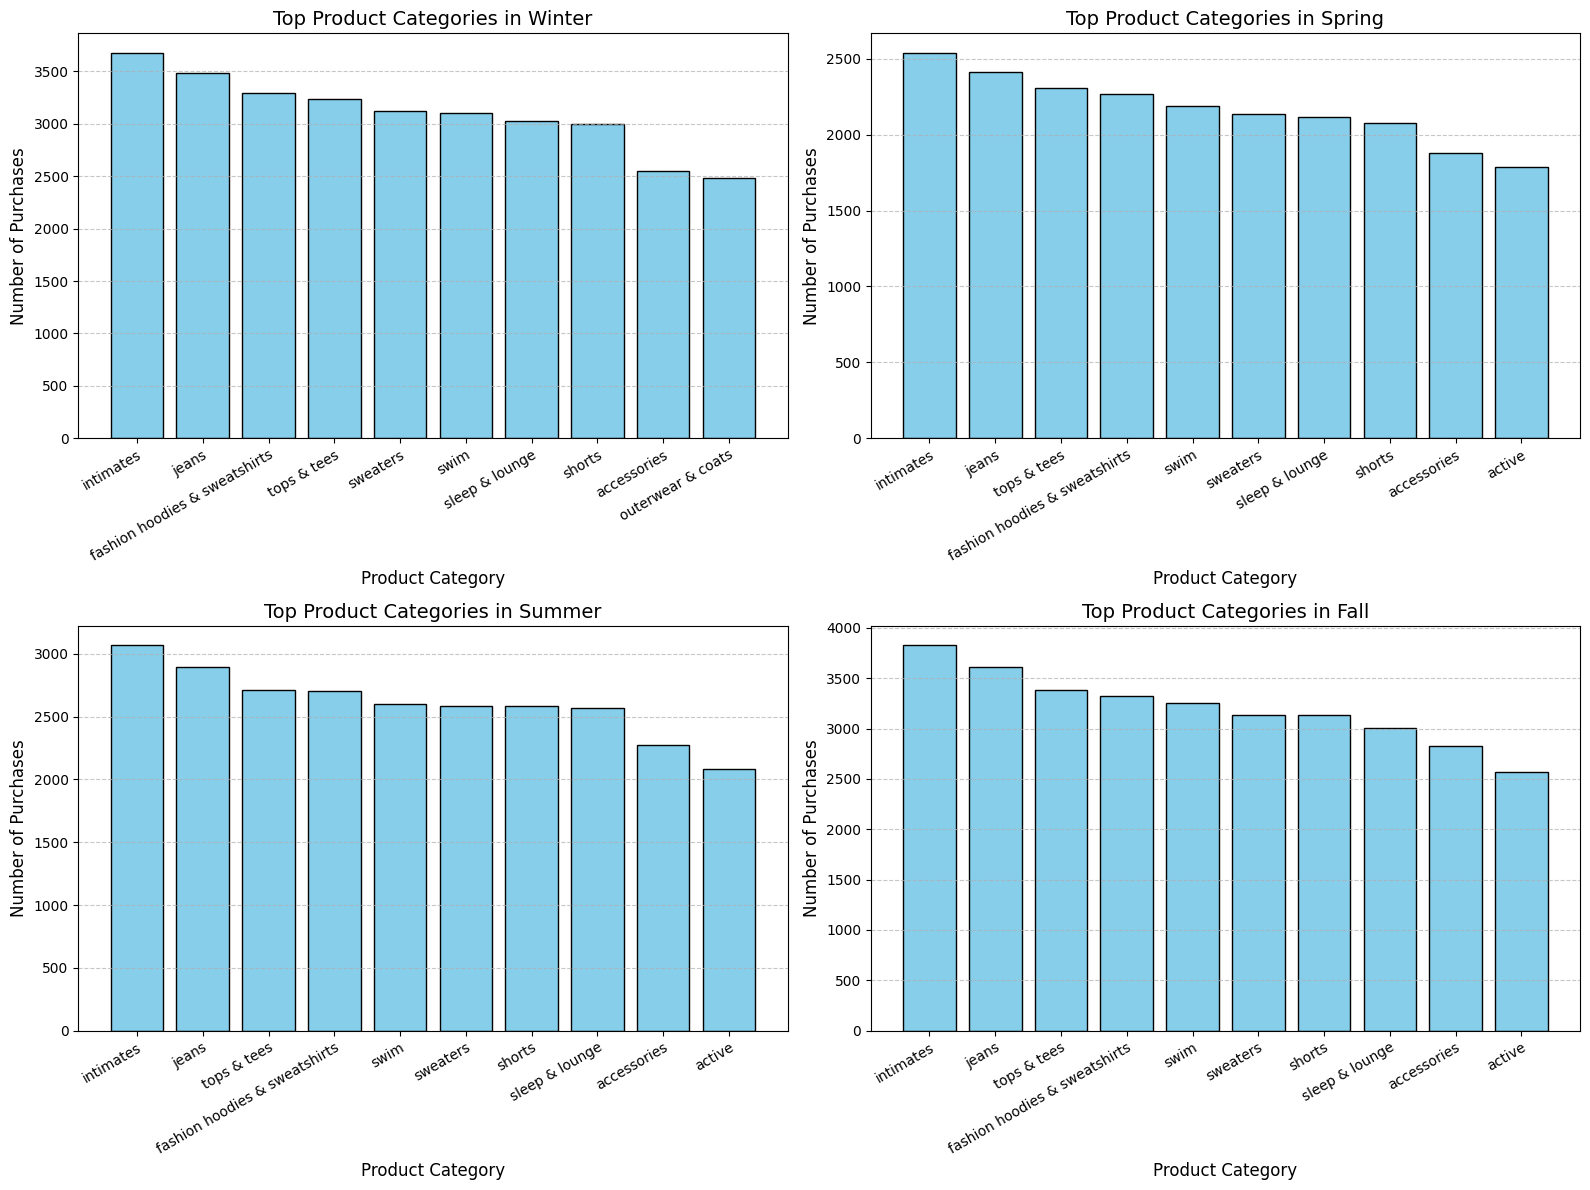

In [21]:


# Load datasets
orders = pd.read_csv('../../data/processed/cleaned_orders.csv')  # Orders dataset
order_items = pd.read_csv('../../data/processed/cleaned_order_items.csv')  # Order items dataset
products = pd.read_csv('../../data/processed/cleaned_products.csv')  # Products dataset

# Merge order_items with products to get category information
merged_data = order_items.merge(products, left_on='product_id', right_on='id')

# Ensure 'created_at' is in datetime format
merged_data['created_at'] = pd.to_datetime(merged_data['created_at'])

# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Create a new 'season' column based on 'created_at'
merged_data['season'] = merged_data['created_at'].dt.month.apply(get_season)

# Group by 'season' and 'product_category' to count purchases
seasonal_categories = (
    merged_data.groupby(['season', 'category'])
    .size()
    .reset_index(name='purchase_count')
)

# Plot the data: One plot for each season
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Create a 2x2 grid for the plots
axes = axes.flatten()  # Flatten axes for easier indexing


for i, season in enumerate(seasons):
    season_data = seasonal_categories[seasonal_categories['season'] == season]
    season_data = season_data.sort_values(by='purchase_count', ascending=False).head(10)  # Top 10 categories
    
    axes[i].bar(season_data['category'], season_data['purchase_count'], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Top Product Categories in {season}', fontsize=14)
    axes[i].set_xlabel('Product Category', fontsize=12)
    axes[i].set_ylabel('Number of Purchases', fontsize=12)
    
    # Adjust x-axis labels for better readability
    axes[i].set_xticklabels(season_data['category'], rotation=30, ha='right', fontsize=10, wrap=True)  
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [20]:
# Merge the datasets on 'user_id' from order_items and 'id' from users
order_items_with_country = order_items.merge(users, left_on='user_id', right_on='id', how='left')

# Step 3: Group by 'country' and calculate total spending
country_spending = order_items_with_country.groupby('country')['sale_price'].sum().reset_index()

# Step 4: Sort the countries by total spending in descending order
country_spending = country_spending.sort_values(by='sale_price', ascending=False)

# Step 5: Display the resulting table
print(country_spending)

           country    sale_price
4            china  3.740708e+06
15   united states  2.413996e+06
3           brasil  1.554890e+06
12     south korea  5.795590e+05
8           france  5.065446e+05
14  united kingdom  5.055917e+05
9          germany  4.518370e+05
13           spain  4.386681e+05
10           japan  2.604493e+05
0        australia  2.196042e+05
2          belgium  1.253414e+05
11          poland  2.834159e+04
5         colombia  1.188240e+03
7           españa  1.659900e+02
6      deutschland  1.499900e+02
1          austria  8.449000e+01


## Countries by profit

In [ ]:
import pandas as pd

# Set pandas to display numbers in decimal format (not scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)

# Step 1: Merge order_items with products to access product costs
products = pd.read_csv('../../data/processed/cleaned_products.csv')

# Print data types to check the structure
print(order_items.dtypes)
print(products.dtypes)

# Merge order_items with products to add the cost column
order_items_with_cost = order_items.merge(products, left_on='product_id', right_on='id', how='left')

# Step 2: Filter out canceled and returned orders
# Assuming 'status' column indicates 'canceled' or 'returned' for those orders
order_items_with_cost = order_items_with_cost[~order_items_with_cost['status'].isin(['canceled', 'returned'])]
print(len(order_items_with_cost))

# Calculate profit for each transaction
order_items_with_cost['profit'] = order_items_with_cost['sale_price'] - order_items_with_cost['cost']

# Step 3: Merge with users to get country information
order_items_with_country = order_items_with_cost.merge(users, left_on='user_id', right_on='id', how='left')

# Step 4: Group by 'country' and calculate total profit
country_profit = order_items_with_country.groupby('country')['profit'].sum().reset_index()

# Step 5: Sort by profit in descending order
country_profit = country_profit.sort_values(by='profit', ascending=False)

# Step 6: Display the resulting table
print(country_profit)



id                     int64
order_id               int64
user_id                int64
product_id             int64
inventory_item_id      int64
status                object
created_at            object
shipped_at            object
delivered_at          object
returned_at           object
sale_price           float64
dtype: object
id                          int64
cost                      float64
category                   object
name                       object
brand                      object
retail_price              float64
department                 object
sku                        object
distribution_center_id      int64
dtype: object
163527
           country     profit
4            china 1739543.19
15   united states 1128797.94
3           brasil  723025.30
12     south korea  269223.43
14  united kingdom  237137.06
8           france  235998.76
9          germany  214013.55
13           spain  205479.72
10           japan  121123.70
0        australia  101420.43
2         